# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(183608)

data = pd.read_csv('Assignment1dataset22.csv',header='infer')
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
0,0,0,0,0,0,0,0,70194,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,70193,0,0,0,0,13,0,0
2,0,0,0,0,0,0,0,70192,8153,0,0,0,5,1,0
3,0,0,0,0,0,0,0,70191,420,0,0,0,30,1,0
4,0,0,0,0,0,0,0,70190,2251,0,0,0,3,1,0


In [133]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70194 entries, 0 to 70193
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X0      70194 non-null  int64
 1   X1      70194 non-null  int64
 2   X2      70194 non-null  int64
 3   X3      70194 non-null  int64
 4   X4      70194 non-null  int64
 5   X5      70194 non-null  int64
 6   X6      70194 non-null  int64
 7   X7      70194 non-null  int64
 8   X8      70194 non-null  int64
 9   X9      70194 non-null  int64
 10  X10     70194 non-null  int64
 11  X11     70194 non-null  int64
 12  X12     70194 non-null  int64
 13  X13     70194 non-null  int64
 14  label   70194 non-null  int64
dtypes: int64(15)
memory usage: 8.0 MB
None


In [134]:
print(data['label'].value_counts())
print("The dataset has", data.shape[0], "samples and", data.shape[1]-1, "features")
missing_values = data.isnull().sum().any()
print ('Are there missing values?', missing_values)
print("Are there duplicated instances?'", data.iloc[:,3:].duplicated().sum().any())

0    66670
1     3524
Name: label, dtype: int64
The dataset has 70194 samples and 14 features
Are there missing values? False
Are there duplicated instances?' False


In [139]:
data.describe(include='all')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
count,70194.00000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,7.019400e+04,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000
mean,0.00057,0.002764,0.486338,0.001966,0.001952,0.539961,0.020899,35097.500000,4.124542e+03,0.001382,160.100621,0.012323,32.316437,0.675656,0.050204
std,0.02503,0.101522,32.071616,0.060359,0.044136,32.683800,0.631882,20263.406735,6.411336e+04,0.050761,1272.409804,0.110324,81.800379,0.468133,0.218367
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17549.250000,6.700000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35097.500000,3.370000e+02,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52645.750000,1.875000e+03,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000
max,2.00000,8.000000,7479.000000,2.000000,1.000000,7468.000000,43.000000,70194.000000,7.028652e+06,4.000000,40504.000000,1.000000,511.000000,1.000000,1.000000


In [2]:
# Extract features and label data
data_features = data.iloc[:, :-1]
data_labels = data.iloc[:, -1]
feature_names = data_features.columns  

In [3]:
cols=[]
for col in feature_names:
    if data_features[col].nunique() == data_features.shape[0]:
        print(col, "has as many unique values as instances in the dataset: it will not help with prediction therefore it can be dropped")
        cols.append(col)

X7 has as many unique values as instances in the dataset: it will not help with prediction therefore it can be dropped


#    Data Visualization

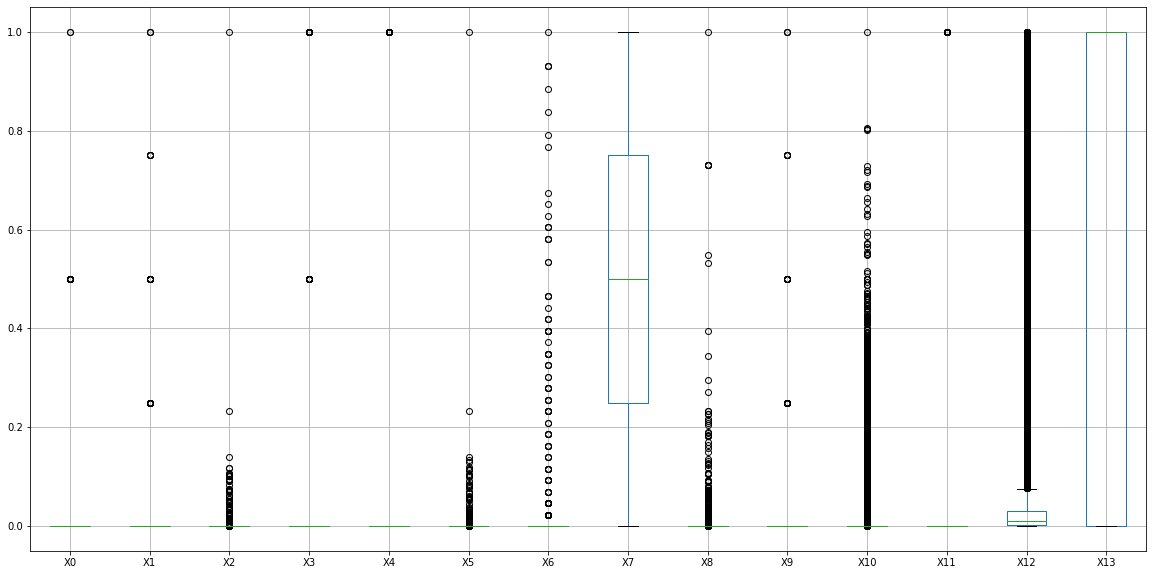

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data_features)
scaled_data_features = scaler.transform(data_features) 
data_to_plot = pd.DataFrame(data=scaled_data_features, columns = feature_names)
data_to_plot.boxplot(figsize=(20,10))
plt.show()

Similar to what was done in the sampleGaussian.py used in week 2, I have created a function to calculate the outliers using boxplot and then used this function in all the features of the dataset

In [4]:
def find_outliers(feature):   

    # finding the 1st quartile
    q1 = np.quantile(feature, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(feature, 0.75)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    #print(iqr, upper_bound, lower_bound)
    
    outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
    print("outliers", outliers)
          
    print("Number of boxplot anomalies:", len(outliers),"\nPercentage",100*len(outliers)/len(feature),"\n")
    return outliers

for (column_name, column_data) in data_features.iteritems():
    print('Column Name : ', column_name)
    outliers = find_outliers(data_features[column_name].to_numpy())

    

Column Name :  X0
outliers [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Number of boxplot anomalies: 38 
Percentage 0.05413568111234578 

Column Name :  X1
outliers [4 2 2 4 2 2 6 2 2 2 8 2 2 2 2 2 4 2 2 6 2 2 2 2 6 8 2 2 2 2 8 2 2 4 2 2 2
 6 2 2 4 4 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2]
Number of boxplot anomalies: 69 
Percentage 0.09829899991452261 

Column Name :  X2
outliers [   3    2   19    5    2    1    4    2    1    1    2    3    2    5
    1  107  462    2    2    2  110    1    1    6    2  151    1    2
    7   31    1    6    9    4    2    3    1    1    4  157   13    1
    1    5    5    2  558    1    2    2   12    1    1    4    4    3
   12  371    7    2    4    2    6    4    1    6  151  217   83    1
    3  193    6    2  789    2  520    6    2    4    4  884    6    2
  457    3    1    1    3  767    9    2    2    2    1    2    3    6
  756    2    6    2    2    1    1   21    1   10  281    6    1    1

In [5]:
Q1 = data_features.quantile(0.25)
Q3 = data_features.quantile(0.75)
IQR = Q3 - Q1
#print(Q3)
mask = ((data_features < (Q1 - 1.5 * IQR)) | (data_features > (Q3 + 1.5 * IQR)))

for (column_name, column_data) in mask.iteritems():
    print('Column Name : ', column_name)
    feature_data_values= pd.Series(column_data.values)
    print(feature_data_values.value_counts())
    print(data.loc[feature_data_values,'label'].value_counts())
    print()

Column Name :  X0
False    70156
True        38
dtype: int64
0    38
Name: label, dtype: int64

Column Name :  X1
False    70125
True        69
dtype: int64
0    68
1     1
Name: label, dtype: int64

Column Name :  X2
False    69823
True       371
dtype: int64
0    368
1      3
Name: label, dtype: int64

Column Name :  X3
False    70115
True        79
dtype: int64
0    79
Name: label, dtype: int64

Column Name :  X4
False    70057
True       137
dtype: int64
0    137
Name: label, dtype: int64

Column Name :  X5
False    69565
True       629
dtype: int64
0    626
1      3
Name: label, dtype: int64

Column Name :  X6
False    69946
True       248
dtype: int64
0    247
1      1
Name: label, dtype: int64

Column Name :  X7
False    70194
dtype: int64
Series([], Name: label, dtype: int64)

Column Name :  X8
False    60947
True      9247
dtype: int64
0    9246
1       1
Name: label, dtype: int64

Column Name :  X9
False    70125
True        69
dtype: int64
0    68
1     1
Name: label, dtype:

# Feature selection

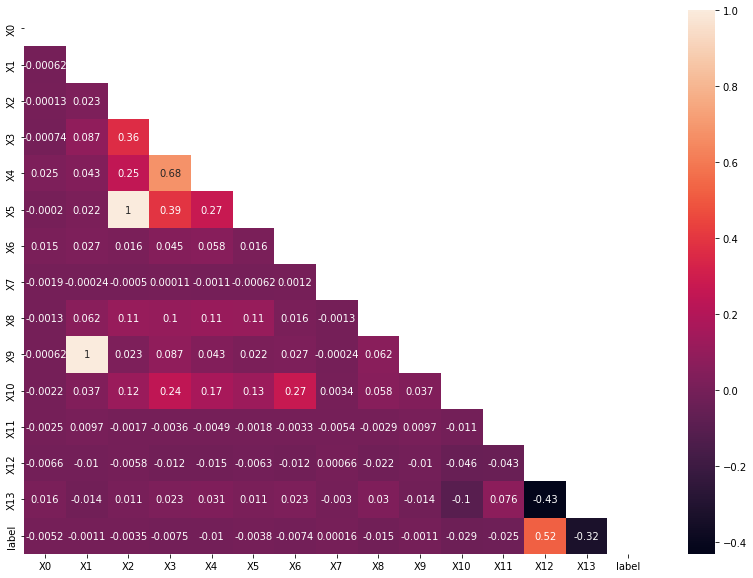

In [164]:
plt.figure(figsize=(14, 10))
hm = sns.heatmap(data.corr(), annot=True, mask=np.triu(data.corr()))
plt.show()

Based on the above, the pairs X1-X9 and X5-X2 have very strong correlation respectively and one of the features of each pair can be dropped.

https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c

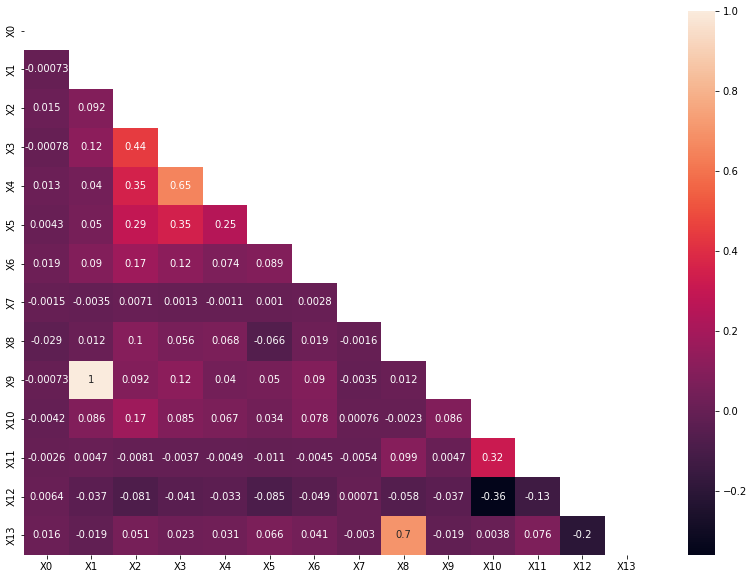

In [92]:
plt.figure(figsize=(14, 10))
corr = data_features.corr(method = 'spearman')
hm = sns.heatmap(corr, annot=True, mask=np.triu(corr))
plt.show()

Based on the above, the pairs X1-X9 and X8-X13 have very strong and strong correlation respectively and one of the features of each pair can be dropped.

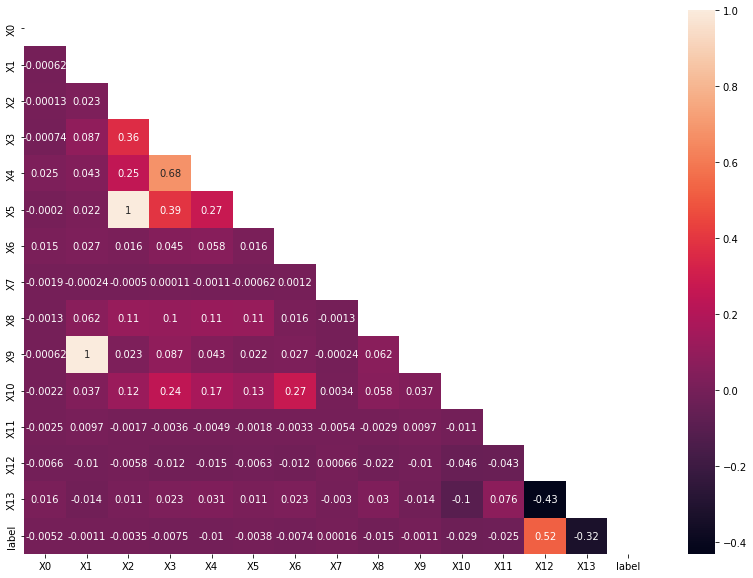

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
X0,1.000014,-0.000620,-0.000132,-0.000742,0.024785,-0.000202,0.015461,-0.001948,-0.001298,-0.000620,-0.002240,-0.002543,-0.006559,0.015774,-0.005234
X1,-0.000620,1.000014,0.022751,0.087460,0.043309,0.021576,0.026638,-0.000238,0.062093,1.000014,0.037458,0.009679,-0.010364,-0.013513,-0.001118
X2,-0.000132,0.022751,1.000014,0.363316,0.248573,0.998860,0.015906,-0.000500,0.107356,0.022751,0.118619,-0.001694,-0.005759,0.010507,-0.003480
X3,-0.000742,0.087460,0.363316,1.000014,0.677738,0.391699,0.044868,0.000109,0.103464,0.087460,0.242838,-0.003638,-0.012458,0.022568,-0.007489
X4,0.024785,0.043309,0.248573,0.677738,1.000014,0.268979,0.057795,-0.001076,0.112926,0.043309,0.166760,-0.004940,-0.014937,0.030639,-0.010167
X5,-0.000202,0.021576,0.998860,0.391699,0.268979,1.000014,0.016234,-0.000625,0.107336,0.021576,0.126456,-0.001845,-0.006289,0.011447,-0.003792
X6,0.015461,0.026638,0.015906,0.044868,0.057795,0.016234,1.000014,0.001201,0.015914,0.026638,0.272551,-0.003286,-0.012158,0.022820,-0.007398
X7,-0.001948,-0.000238,-0.000500,0.000109,-0.001076,-0.000625,0.001201,1.000014,-0.001266,-0.000238,0.003394,-0.005442,0.000662,-0.003003,0.000162
X8,-0.001298,0.062093,0.107356,0.103464,0.112926,0.107336,0.015914,-0.001266,1.000014,0.062093,0.058029,-0.002889,-0.021598,0.029646,-0.014757
X9,-0.000620,1.000014,0.022751,0.087460,0.043309,0.021576,0.026638,-0.000238,0.062093,1.000014,0.037458,0.009679,-0.010364,-0.013513,-0.001118


In [93]:
from sklearn.preprocessing import StandardScaler 

cols = data.columns
stdsc = StandardScaler() 
X_std = pd.DataFrame(stdsc.fit_transform(data), columns=cols)

plt.figure(figsize=(14, 10))
hm = sns.heatmap(X_std.cov(), annot=True, mask=np.triu(X_std.cov()))
plt.show()
X_std.cov()

#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Build a forest and compute the feature importance
forest = RandomForestClassifier(n_estimators=250, random_state=183608)

important_data = data.drop(['X7', 'X2', 'X9'],axis=1)

forest.fit(important_data.iloc[:, :-1], important_data.iloc[:, -1])
importances = forest.feature_importances_
for index in range(len(important_data.iloc[:, :-1].columns  )):
    print ("Importance of feature ", index, "is", importances[index])

Importance of feature  0 is 5.0893661556572045e-05
Importance of feature  1 is 0.00015609549586294036
Importance of feature  2 is 2.0263453027366847e-06
Importance of feature  3 is 4.523683471195591e-06
Importance of feature  4 is 0.0013916609644149941
Importance of feature  5 is 0.00030316566608214
Importance of feature  6 is 0.2679775704781286
Importance of feature  7 is 0.009900698299201673
Importance of feature  8 is 0.00013298893286767144
Importance of feature  9 is 0.6434653575878128
Importance of feature  10 is 0.07661501888529872


https://sparida.blogspot.com/2019/11/feature-selection-and-dimensionality.html

In [7]:
smaller_data = data.drop(['X9','X7','X2','X3'],axis=1)

# Extract features and label data
data_features = smaller_data.iloc[:, :-1]
data_labels = smaller_data.iloc[:, -1]
feature_names = data_features.columns 

#scaler = StandardScaler().fit(data_features)
#scaled_data_features = scaler.transform(data_features) 


## Divide dataset in training and testing
https://limitlessdatascience.wordpress.com/2019/02/18/use-of-numpy-random-seed-and-random_state-in-train_test-split-function/

In [27]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_features, data_labels, test_size=0.2, random_state=183608)
print()

# Balanced Dataset

In [28]:
from collections import Counter
from imblearn.combine import SMOTEENN


print("before", sorted(Counter(y_train).items()))
smote_enn = SMOTEENN(random_state=183608)
X_balanced, y_balanced = smote_enn.fit_resample(X_train, y_train)
print("after", sorted(Counter(y_balanced).items()))


before [(0, 53366), (1, 2789)]
after [(0, 52149), (1, 37808)]


# Classifier

In [15]:
from imblearn.pipeline import Pipeline 
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
import joblib
from sklearn.metrics import accuracy_score, classification_report

smoteenn = SMOTEENN(random_state=183608)
knn = KNeighborsClassifier()

pipeline_balanced = Pipeline([('scaler', StandardScaler()), ('sampling', smoteenn ), ('classifier', knn )])
pipeline_imbalanced = Pipeline([('scaler', StandardScaler()), ('classifier', knn )])


param_grid_knn = [{'classifier__n_neighbors': np.arange(1, 30, 1), 'classifier__weights': ["uniform", "distance"], 'classifier__p': [1, 2]}]

grid_knn_balanced = GridSearchCV(pipeline_balanced, param_grid_knn, cv=3, n_jobs=-1, verbose=2)
print(grid_knn_balanced.estimator.get_params().keys())
grid_knn_balanced.fit(X_train, y_train.values.ravel())
print(grid_knn_balanced.best_params_ , "with a score of ", grid_knn_balanced.best_score_)
clf_knn_balanced = grid_knn_balanced.best_estimator_
joblib.duI hamp(clf_knn_balanced, 'churn_knn_balanced.joblib')
clf_knn_balanced.fit(X_train, y_train.values.ravel())
predictions_knn_balanced = clf_knn_balanced.predict(X_test)
print(accuracy_score(y_test.values.ravel(), predictions_knn_balanced))
print ("classification report\n" , classification_report(y_test, predictions_knn_balanced))


grid_knn_imbalanced = GridSearchCV(pipeline_imbalanced, param_grid_knn, cv=3, n_jobs=-1, verbose=2)
print(grid_knn_imbalanced.estimator.get_params().keys())
grid_knn_imbalanced.fit(X_train, y_train.values.ravel())
print(grid_knn_imbalanced.best_params_ , "with a score of ", grid_knn_imbalanced.best_score_)
clf_knn_imbalanced = grid_knn_imbalanced.best_estimator_
joblib.dump(clf_knn_imbalanced, 'churn_knn_imbalanced.joblib')
clf_knn_imbalanced.fit(X_train, y_train.values.ravel())
predictions_knn_imbalanced = clf_knn_imbalanced.predict(X_test)
print(accuracy_score(y_test.values.ravel(), predictions_knn_imbalanced))
print ("classification report\n" , classification_report(y_test, predictions_knn_imbalanced))


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sampling', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampling__enn', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'sampling__smote', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 1, 'classifier__p': 1, 'classifier__weights': 'uniform'} with a score of  0.9657911430340125
0.9626041740864734
classification report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     13304
           1       0.61      0.80      0.69       735

    accuracy                           0.96     14039
   macro avg       0.80      0.88      0.84     14039
weighted avg       0.97      0.96      0.96     14039

dict_keys

In [35]:
from sklearn.metrics import accuracy_score

print ('Test Accuracy Balanced:', accuracy_score( y_test, predictions_knn_balanced,))

print ('Test Accuracy Imbalanced:', accuracy_score( y_test, predictions_knn_imbalanced))


Test Accuracy Balanced: 0.9626041740864734
Test Accuracy Imbalanced: 0.9737873067882328


In [34]:
from sklearn.metrics import confusion_matrix

conf_mat_bal = confusion_matrix(y_true=y_test, y_pred=predictions_knn_balanced, normalize='all')
print ('Confusion Matrix Balanced', conf_mat_bal)

conf_mat_imbal = confusion_matrix(y_true=y_test, y_pred=predictions_knn_imbalanced, normalize='all')
print ('Confusion Matrix Imbalanced', conf_mat_imbal)

Confusion Matrix Balanced [[0.92093454 0.0267113 ]
 [0.01068452 0.04166963]]
Confusion Matrix Imbalanced [[0.93745993 0.01018591]
 [0.01602678 0.03632737]]
